In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('/content/placement.csv')

In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df.shape

(100, 4)

In [11]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [13]:
#pre processing
df = df.iloc[:, 1:]

In [14]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [17]:
# EDA -> small data, so max that can be Shown is data kaisa diktha h?
import matplotlib.pyplot as plt

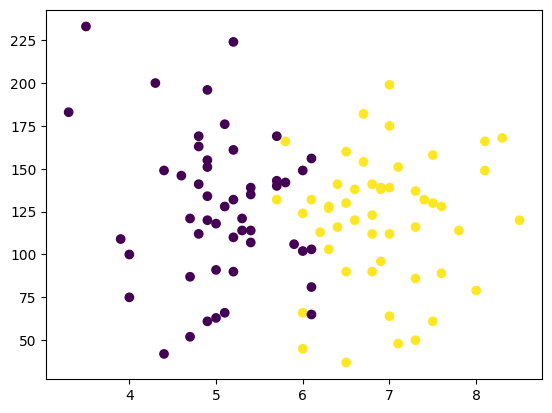

In [77]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
#for linear behaviour, types of data can be separated by line -> use logistic regression
# By doing EDA, we understood data is linear, classes can be separated linearly, so now logistic regression can be used
# EDA gives idea about data and how to proceed, no further scope in this data
# here feature selection is not major role as only two input columns and both are used, so ignore feature selection as this is toy data

In [78]:
# step1: Extract input and output cols
#Extract input and output
#cgpa, iq -> independent, and placement = dependent

In [79]:
X = df.iloc[:, 0:2] # independent
y = df.iloc[:, -1] # dependent

In [80]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [81]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [82]:
y.shape

(100,)

In [83]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

In [84]:
X_train

,cgpa,iq
7,5.0,63.0
41,5.4,114.0
39,4.6,146.0
59,4.8,112.0
70,6.3,127.0
...,...,...
42,7.6,89.0
3,7.4,132.0
12,5.4,139.0
75,4.8,169.0


In [85]:
y_train

,placement
7,0
41,0
39,0
59,0
70,1
...,...
42,1
3,1
12,0
75,0


In [88]:
X_test

,cgpa,iq
99,6.2,113.0
49,5.4,135.0
95,4.3,200.0
72,7.3,116.0
13,6.4,116.0
17,3.3,183.0
97,6.7,182.0
85,5.8,166.0
93,6.8,112.0
88,4.4,149.0


In [39]:
y_test

,placement
64,1
23,0
77,1
86,0
8,0
12,0
67,0
93,1
33,0
21,1


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [89]:
X_train = scaler.fit_transform(X_train)

In [90]:
X_train

array([[-9.16180690e-01, -1.46102407e+00],
       [-5.59613070e-01, -1.75345297e-01],
       [-1.27274831e+00,  6.31355112e-01],
       [-1.09446450e+00, -2.25764073e-01],
       [ 2.42664075e-01,  1.52376744e-01],
       [ 4.20947885e-01, -2.11646816e+00],
       [ 8.66657410e-01,  1.96745266e+00],
       [ 2.42664075e-01,  1.77586132e-01],
       [ 6.43802647e-02,  2.78423683e-01],
       [-7.37896880e-01,  2.78423683e-01],
       [ 7.77515505e-01, -6.29114277e-01],
       [ 6.43802647e-02, -4.52648563e-01],
       [ 5.10089790e-01,  4.29680010e-01],
       [ 8.66657410e-01,  4.54889397e-01],
       [-7.37896880e-01, -2.76182848e-01],
       [ 7.77515505e-01,  4.29680010e-01],
       [ 1.57979265e+00, -1.75345297e-01],
       [ 1.31236693e+00, -1.51144285e+00],
       [-9.16180690e-01, -7.45077461e-02],
       [ 4.20947885e-01, -7.80370604e-01],
       [ 1.13408312e+00,  4.04470622e-01],
       [ 7.77515505e-01,  4.54889397e-01],
       [-2.47616403e-02, -1.91479305e+00],
       [-2.

In [91]:
X_test = scaler.transform(X_test)

In [92]:
X_test

array([[ 0.15352217, -0.20055469],
       [-0.55961307,  0.35405185],
       [-1.54017403,  1.99266205],
       [ 1.13408312, -0.12492652],
       [ 0.33180598, -0.12492652],
       [-2.43159308,  1.56410246],
       [ 0.59923169,  1.53889307],
       [-0.20304545,  1.13554287],
       [ 0.6883736 , -0.22576407],
       [-1.45103212,  0.70698328]])

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
clf = LogisticRegression()

In [95]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_pred = clf.predict(X_test)

In [97]:
y_test

,placement
99,1
49,0
95,0
72,1
13,1
17,0
97,1
85,1
93,1
88,0


In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test, y_pred)

0.9

In [105]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

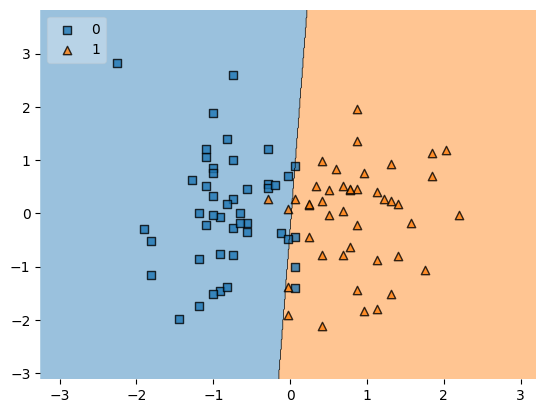

In [106]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [107]:
import pickle

In [108]:
pickle.dump(clf, open('model.pkl', 'wb'))